In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
schoolty_df = pd.read_csv('school_type.csv')

In [3]:
schoolty_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,a_level_status,school_type,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students
0,200809,Academic year,National,E92000001,England,Total,Independent,83.3,53.5,25399,16309,30475
1,200809,Academic year,National,E92000001,England,Total,Selective State,89.2,43.8,18109,8889,20304
2,200809,Academic year,National,E92000001,England,Total,Other State,70.1,15.6,151084,33625,215396
3,200809,Academic year,National,E92000001,England,Total,Total,73.1,22.1,194592,58823,266175
4,200910,Academic year,National,E92000001,England,Total,Independent,85.0,57.5,26559,17981,31247


In [4]:
schoolty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time_period                        104 non-null    int64  
 1   time_identifier                    104 non-null    object 
 2   geographic_level                   104 non-null    object 
 3   country_code                       104 non-null    object 
 4   country_name                       104 non-null    object 
 5   a_level_status                     104 non-null    object 
 6   school_type                        104 non-null    object 
 7   progression_rate                   104 non-null    float64
 8   high_tariff_progression_rate       104 non-null    float64
 9   number_of_he_students              104 non-null    int64  
 10  number_of_high_tariff_he_students  104 non-null    int64  
 11  number_of_students                 104 non-null    int64  

In [5]:
schoolty_df.shape

(104, 12)

In [6]:
schoolty_df.isna().sum()

time_period                          0
time_identifier                      0
geographic_level                     0
country_code                         0
country_name                         0
a_level_status                       0
school_type                          0
progression_rate                     0
high_tariff_progression_rate         0
number_of_he_students                0
number_of_high_tariff_he_students    0
number_of_students                   0
dtype: int64

In [7]:
schoolty_df['year'] = (schoolty_df['time_period'] % 100) + 2000


In [8]:
schoolty_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,a_level_status,school_type,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students,year
0,200809,Academic year,National,E92000001,England,Total,Independent,83.3,53.5,25399,16309,30475,2009
1,200809,Academic year,National,E92000001,England,Total,Selective State,89.2,43.8,18109,8889,20304,2009
2,200809,Academic year,National,E92000001,England,Total,Other State,70.1,15.6,151084,33625,215396,2009
3,200809,Academic year,National,E92000001,England,Total,Total,73.1,22.1,194592,58823,266175,2009
4,200910,Academic year,National,E92000001,England,Total,Independent,85.0,57.5,26559,17981,31247,2010


In [9]:
schoolty_df = schoolty_df[~schoolty_df['school_type'].isin(['Total'])]

schoolty_df.shape

(78, 13)

# Checking for Outliers

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_42963/466092492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=schoolty_df, x='school_type', y='progression_rate',palette='hls')


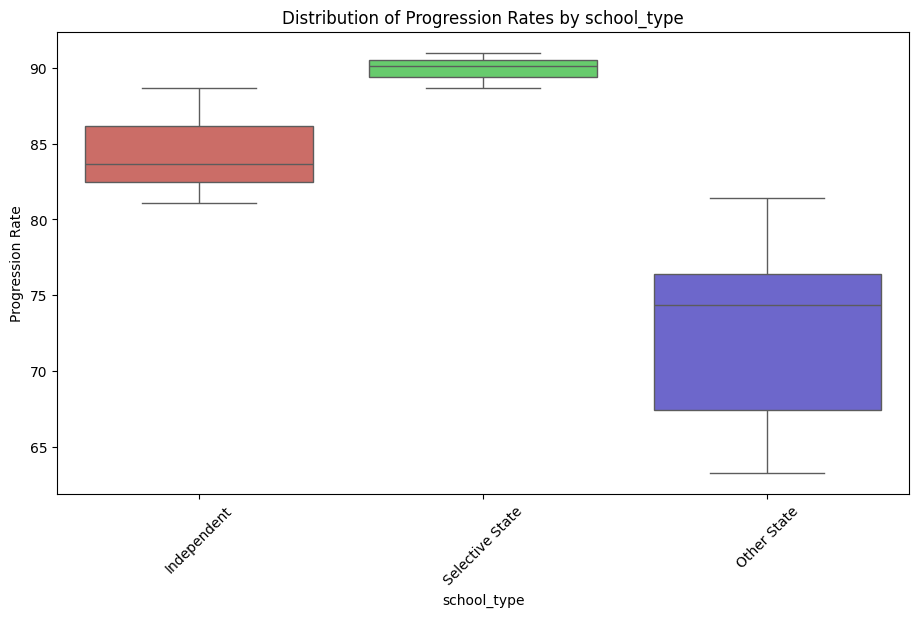

In [10]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=schoolty_df, x='school_type', y='progression_rate',palette='hls')
plt.xticks(rotation=45)
plt.title('Distribution of Progression Rates by school_type')
plt.xlabel('school_type')
plt.ylabel('Progression Rate')
plt.show()

In [11]:
schoolty_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,a_level_status,school_type,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students,year
0,200809,Academic year,National,E92000001,England,Total,Independent,83.3,53.5,25399,16309,30475,2009
1,200809,Academic year,National,E92000001,England,Total,Selective State,89.2,43.8,18109,8889,20304,2009
2,200809,Academic year,National,E92000001,England,Total,Other State,70.1,15.6,151084,33625,215396,2009
4,200910,Academic year,National,E92000001,England,Total,Independent,85.0,57.5,26559,17981,31247,2010
5,200910,Academic year,National,E92000001,England,Total,Selective State,89.9,49.2,18794,10275,20895,2010


# See tableau for Graphs

In [12]:
from sklearn.preprocessing import LabelEncoder

for clname in schoolty_df.columns:
    if schoolty_df[clname].dtype == 'object':
        lblenc_details = LabelEncoder()
        schoolty_df[clname] = lblenc_details.fit_transform(schoolty_df[clname])




In [13]:
schoolty_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,a_level_status,school_type,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students,year
0,200809,0,0,0,0,1,0,83.3,53.5,25399,16309,30475,2009
1,200809,0,0,0,0,1,2,89.2,43.8,18109,8889,20304,2009
2,200809,0,0,0,0,1,1,70.1,15.6,151084,33625,215396,2009
4,200910,0,0,0,0,1,0,85.0,57.5,26559,17981,31247,2010
5,200910,0,0,0,0,1,2,89.9,49.2,18794,10275,20895,2010


In [15]:
cond_det = [(schoolty_df['progression_rate'] < 70),
    (schoolty_df['progression_rate'] >= 70) & (schoolty_df['progression_rate'] <= 80),
    (schoolty_df['progression_rate'] > 80) & (schoolty_df['progression_rate'] <= 100)
]
newlbl = [0,1,2]
schoolty_df['progression_rate'] = pd.cut(schoolty_df['progression_rate'], bins=[-float("inf"), 50, 75, 100], labels=newlbl)

schoolty_df['progression_rate'] = schoolty_df['progression_rate'].astype(int)

In [16]:
unique_prgval = schoolty_df.nunique()
print("Number of unique values\n", unique_prgval)


Number of unique values
 time_period                          14
time_identifier                       1
geographic_level                      1
country_code                          1
country_name                          1
a_level_status                        2
school_type                           3
progression_rate                      2
high_tariff_progression_rate         65
number_of_he_students                77
number_of_high_tariff_he_students    78
number_of_students                   78
year                                 14
dtype: int64


In [17]:
columns_to_drop = ['time_identifier', 'country_code','country_name','geographic_level','time_period']
nwschooltyp_df = schoolty_df.drop(columns=columns_to_drop)

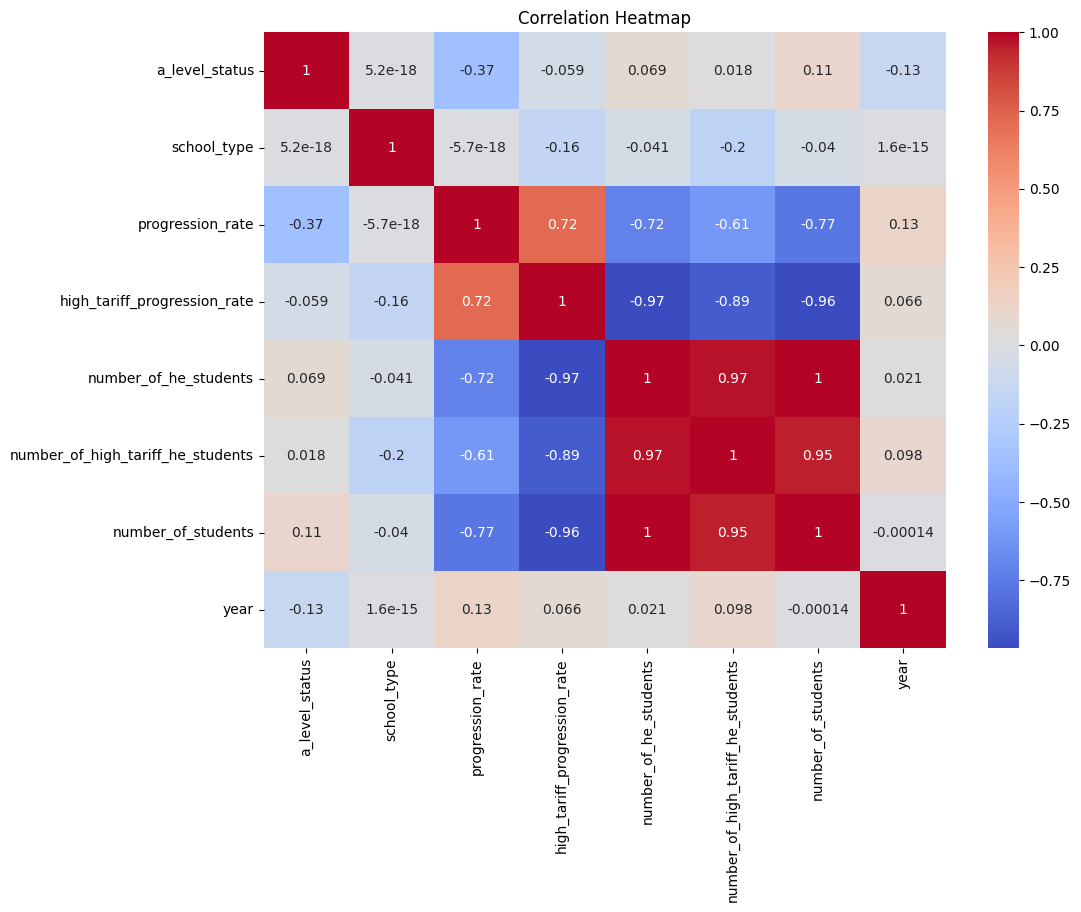

In [18]:
correlationM_det = nwschooltyp_df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(correlationM_det, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
nwschooltyp_df.columns

Index(['a_level_status', 'school_type', 'progression_rate',
       'high_tariff_progression_rate', 'number_of_he_students',
       'number_of_high_tariff_he_students', 'number_of_students', 'year'],
      dtype='object')

In [20]:
nwschooltyp_df.drop('number_of_he_students', axis=1, inplace=True)
nwschooltyp_df.drop('number_of_high_tariff_he_students', axis=1, inplace=True)
nwschooltyp_df.drop('high_tariff_progression_rate', axis=1, inplace=True)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [22]:

xdata = nwschooltyp_df.drop(['progression_rate'], axis=1)  
ydata = nwschooltyp_df['progression_rate']

# Standard Scalar

In [23]:
x_scdata = StandardScaler().fit_transform(xdata)

In [24]:
x_scdata

array([[ 0.9258201 , -1.22474487, -0.65009064, -1.82828283],
       [ 0.9258201 ,  1.22474487, -0.75449089, -1.82828283],
       [ 0.9258201 ,  0.        ,  1.24803129, -1.82828283],
       [ 0.9258201 , -1.22474487, -0.64216644, -1.56565657],
       [ 0.9258201 ,  1.22474487, -0.74842457, -1.56565657],
       [ 0.9258201 ,  0.        ,  1.32744774, -1.56565657],
       [-1.08012345, -1.22474487, -0.64368559, -1.3030303 ],
       [-1.08012345,  1.22474487, -0.75174   , -1.3030303 ],
       [-1.08012345,  0.        ,  0.94801017, -1.3030303 ],
       [ 0.9258201 , -1.22474487, -0.63029041, -1.3030303 ],
       [ 0.9258201 ,  1.22474487, -0.74635114, -1.3030303 ],
       [ 0.9258201 ,  0.        ,  1.50752816, -1.3030303 ],
       [-1.08012345, -1.22474487, -0.64265914, -1.04040404],
       [-1.08012345,  1.22474487, -0.74187581, -1.04040404],
       [-1.08012345,  0.        ,  1.01425726, -1.04040404],
       [ 0.9258201 , -1.22474487, -0.62469626, -1.04040404],
       [ 0.9258201 ,  1.

In [25]:
x_traindts,x_testdts,y_traindts,y_testdts = train_test_split(x_scdata,ydata,test_size = 0.2, random_state=0)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [27]:
from time import time
parlogi_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],
    'penalty': ['l1', 'l2']
}
logreg_gdcv = GridSearchCV(LogisticRegression(), param_grid=parlogi_reg,cv=7, n_jobs=-1)
logreg_gdcv.fit(x_traindts,y_traindts)
logi_bstparm = logreg_gdcv.best_params_
logi_bstscore = logreg_gdcv.best_score_
print("Best_parameters : ", logi_bstparm)
print("Best_score :",logi_bstscore)





Best_parameters :  {'C': 1, 'penalty': 'l2'}
Best_score : 0.9682539682539683


/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
49 fits failed out of a total of 98.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/geetharam/anaconda3/envs/myenv/l

Complete time to build and evaluate :  0.0019211769104003906
 Logistic_Regression accuracy details : 1.0
 Logistic_Regression mean squared error details: 0.0


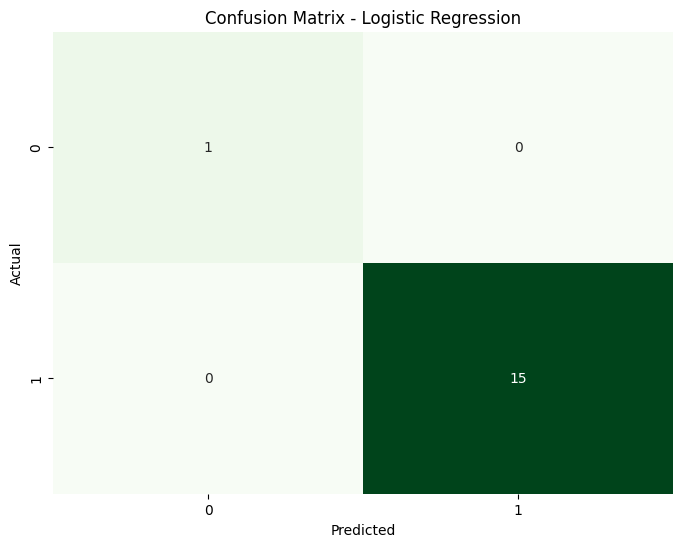


classification report: 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [28]:
from time import time
import numpy as np

logistart_tm = time()

logireg_mdl = LogisticRegression(penalty= 'l2', C = 1,max_iter=900)
logireg_mdl.fit(x_traindts,y_traindts)
logi_ypred = logireg_mdl.predict(x_testdts)

logireg_score = logireg_mdl.score(x_testdts,y_testdts)

logiend_tm = time()

logireg_mse = np.sqrt(mean_squared_error(y_testdts,logi_ypred))

logireg_clsrpt = classification_report(y_testdts,logi_ypred)

#confusion matrix
logireg_cfnmtx = confusion_matrix(y_testdts,logi_ypred)

print("Complete time to build and evaluate : ", logiend_tm-logistart_tm)
print(" Logistic_Regression accuracy details :",logireg_score)
print(" Logistic_Regression mean squared error details:",logireg_mse)

plt.figure(figsize=(8, 6))
sns.heatmap(logireg_cfnmtx, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nclassification report: \n")

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(logireg_clsrpt)

# Decision Tree Classifier

In [29]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
decparm = {
    'criterion': ['gini', "entropy"],
    'max_depth': [a for a in range(1, 65, 5)], 
    'min_samples_leaf': [b for b in range(1, 21, 1)]}
dectr_gd = GridSearchCV(DecisionTreeClassifier(), param_grid=decparm, cv=5) 
dectr_gd.fit(x_traindts, y_traindts)


print(" Best parameters : ",dectr_gd.best_params_)
print("Best score : ",dectr_gd.best_score_)

 Best parameters :  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Best score :  0.9692307692307693


Decision Tree Algorithm:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 time 0.0007507801055908203

Score : 1.0
 Confusion matrix :


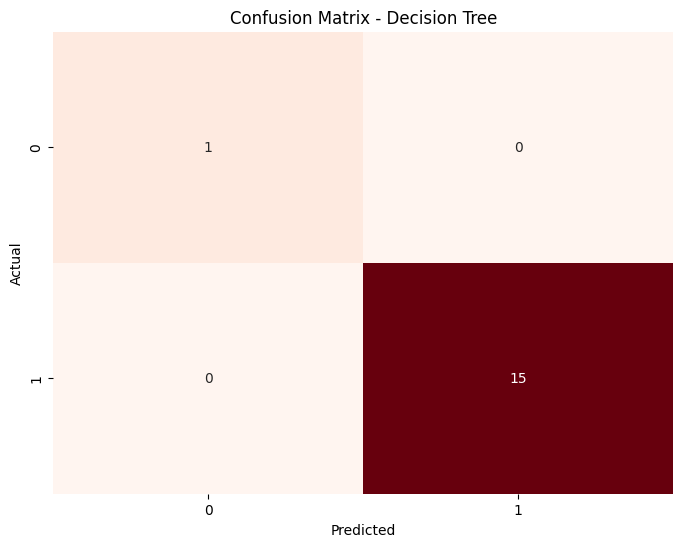


Classification Report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [31]:
logistart_tm = time()
dectr_modl = DecisionTreeClassifier(criterion = 'gini', max_depth = 1,min_samples_leaf = 1)
dectr_modl.fit(x_traindts,y_traindts)
logiend_tm = time()
dectr_ypred = dectr_modl.predict(x_testdts)
dectr_scr = dectr_modl.score(x_testdts,y_testdts)
dectr_confm = confusion_matrix(y_testdts,dectr_ypred)
dectr_clssrpt = classification_report(y_testdts,dectr_ypred)
print("Decision Tree Algorithm:")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(" time",logiend_tm-logistart_tm)
print("\nScore :",dectr_scr)
print(" Confusion matrix :")
plt.figure(figsize=(8, 6))
sns.heatmap(dectr_confm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report :")
print(dectr_clssrpt)


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
randfst_parm = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": range(200, 900, 200)}
randfst_gdcv = GridSearchCV(RandomForestClassifier(), param_grid=randfst_parm, cv=5)
randfst_gdcv.fit(x_traindts, y_traindts)
print('Best Random Forest attributes:', randfst_gdcv.best_params_)
print('Best random forest Score:', randfst_gdcv.best_score_)

Best Random Forest attributes: {'criterion': 'gini', 'n_estimators': 200}
Best random forest Score: 0.9525641025641025


Random forest Evaluation
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
time :  0.37339329719543457
 score:  1.0


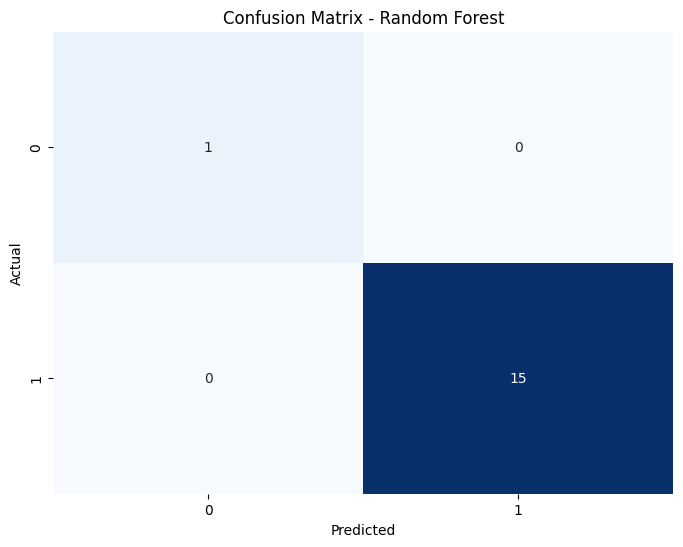


classification report :

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [34]:
rndmfst_st = time()
rndmfst_mdl = RandomForestClassifier(criterion="gini", max_depth= 20,n_estimators=1000)
rndmfst_mdl.fit(x_traindts, y_traindts)
rndmfst_ed = time()
rndmfst_ypred = rndmfst_mdl.predict(x_testdts)

rndmfst_scr = rndmfst_mdl.score(x_testdts,y_testdts)
rndmfst_confm = confusion_matrix(y_testdts,rndmfst_ypred)
rndmfst_clsrpt = classification_report(y_testdts,rndmfst_ypred)

print("Random forest Evaluation")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("time : ",rndmfst_ed-rndmfst_st)
print(" score: ",rndmfst_scr)

plt.figure(figsize=(8, 6))
sns.heatmap(rndmfst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nclassification report :\n")
print(rndmfst_clsrpt)



# Bagging Classifier with Decision Tree

Bagging classifier
 total time taken : 0.5173439979553223
Accuracy score: 1.0


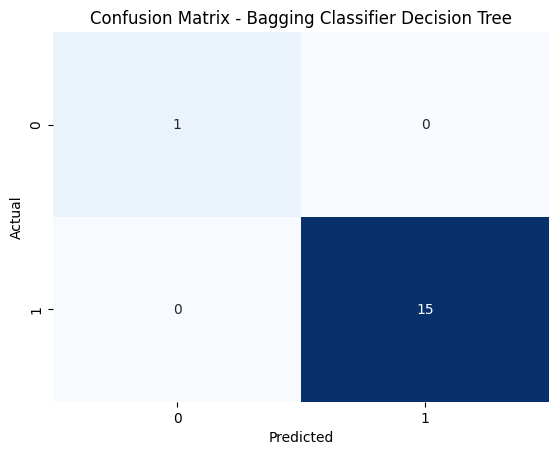

 Bagging classifier score : 1.0
classification report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [35]:
from sklearn.ensemble import BaggingClassifier

baggdt_str = time()
baggdt_clsmdl = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 30,min_samples_leaf = 1), n_estimators=950, bootstrap=True)
baggdt_clsmdl.fit(x_traindts, y_traindts)

baggdt_ypred = baggdt_clsmdl.predict(x_testdts)

baggdt_scr = baggdt_clsmdl.score(x_testdts,y_testdts)

baggdt_confm = confusion_matrix(y_testdts,baggdt_ypred)
baggdt_clsrpt = classification_report(y_testdts,baggdt_ypred)
baggdt_ed = time()
print("Bagging classifier")
print("==============================")
print(" total time taken :",baggdt_ed-baggdt_str )
print("Accuracy score:",baggdt_scr)
sns.heatmap(baggdt_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bagging Classifier Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(" Bagging classifier score :",baggdt_scr)
print("classification report :")
print(baggdt_clsrpt)

# Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier


Gradient Boosting Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  0.11854696273803711
 
accuracy :  1.0


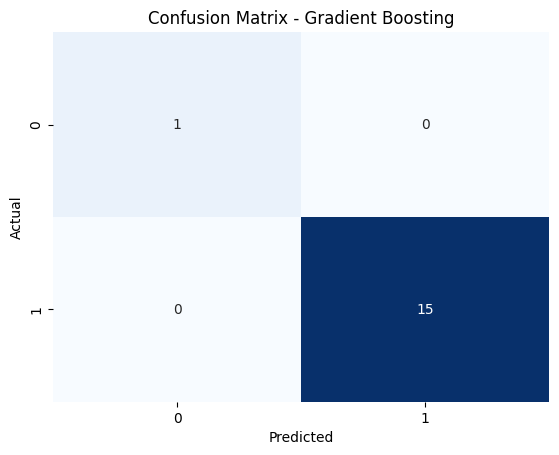

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [37]:
gradi_stm = time()
gradibst_mdl = GradientBoostingClassifier(n_estimators=900,learning_rate=0.7,
                                          min_samples_leaf=4,
                                          max_depth=15)
gradibst_mdl.fit(x_traindts,y_traindts)

gradibst_ypred = gradibst_mdl.predict(x_testdts)

gradibst_score = gradibst_mdl.score(x_testdts,y_testdts)

gradibst_confm = confusion_matrix(y_testdts,gradibst_ypred)


gradibst_clsrpt = classification_report(y_testdts,gradibst_ypred)
gradi_edtm = time()
print("Gradient Boosting Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",gradi_edtm-gradi_stm)
print(" \naccuracy : ",gradibst_score)

sns.heatmap(gradibst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : \n",gradibst_clsrpt)